In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,ConfusionMatrixDisplay
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
df=pd.read_csv('/content/earthquakes.csv')
df

**`Exploratory Data Analysis `**

In [2]:
df['updated'].value_counts()

,count
updated,
2024-02-06T21:53:58.040Z,15
2023-12-14T21:26:52.040Z,10
2023-12-14T21:26:55.040Z,7
2023-11-18T22:29:33.040Z,6
2024-04-24T14:42:02.040Z,6
...,...
2022-05-03T18:06:25.150Z,1
2017-03-16T02:31:30.040Z,1
2017-03-16T02:31:29.040Z,1





`Scatter plot`




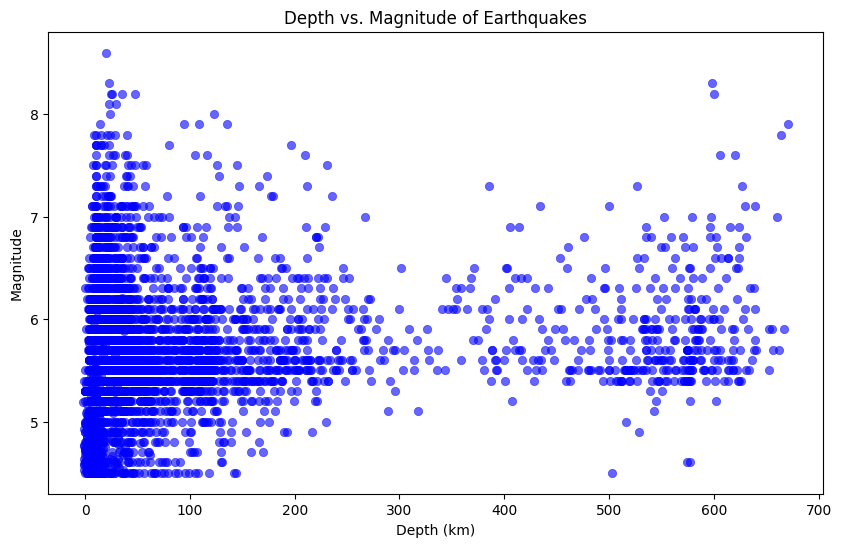

In [3]:

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="depth", y="mag", alpha=0.6, edgecolor=None, color="blue")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.title("Depth vs. Magnitude of Earthquakes")
plt.show()


 graph shows that most earthquakes happen at shallow depths (0-100 km), mainly with magnitudes between 5 and 6. Deeper earthquakes (200-700 km) are less common but still occur, sometimes with high magnitudes (7+).

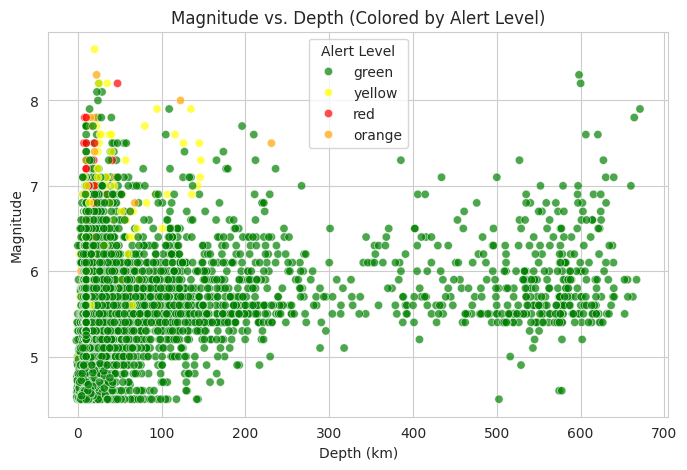

In [4]:

alert_colors = {"green": "green", "yellow": "yellow", "orange": "orange", "red": "red"}
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="depth", y="mag", hue="Alert", alpha=0.7, palette=alert_colors)
plt.title("Magnitude vs. Depth (Colored by Alert Level)")
plt.xlabel("Depth (km)")
plt.ylabel("Magnitude")
plt.legend(title="Alert Level")
plt.show()


scatter plot shows how magnitude and depth relate to alert levels. It seems that higher magnitudes are more likely to trigger higher alert levels (yellow or above), while most low-magnitude events remain "green."

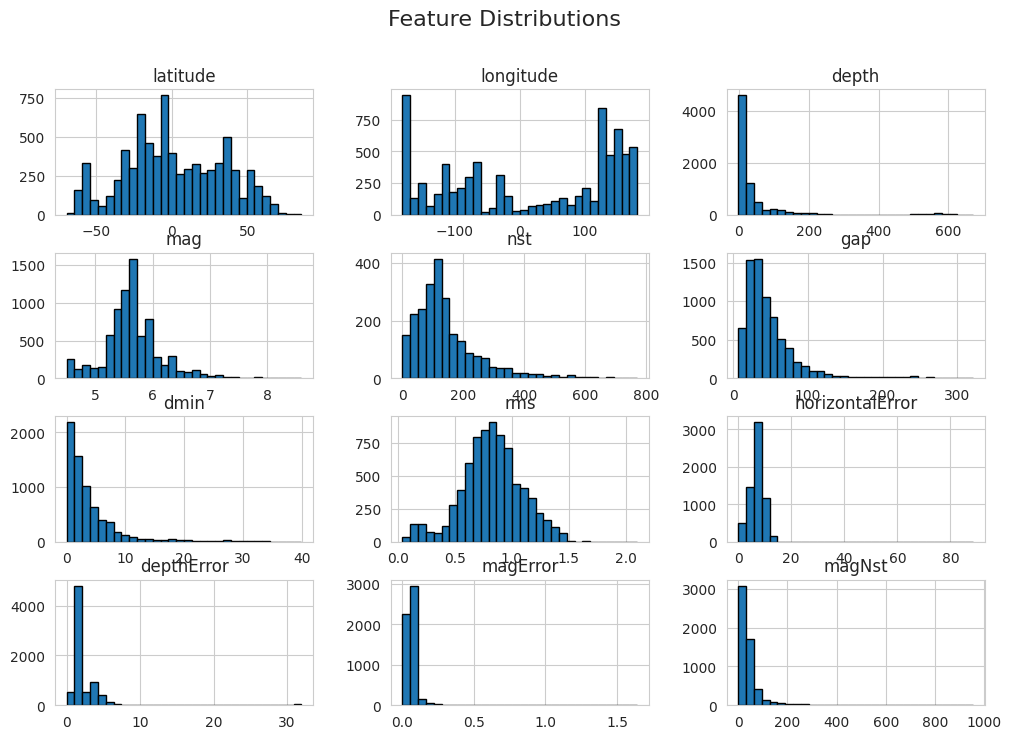

In [5]:
df.hist(figsize=(12, 8), bins=30, edgecolor="black")
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

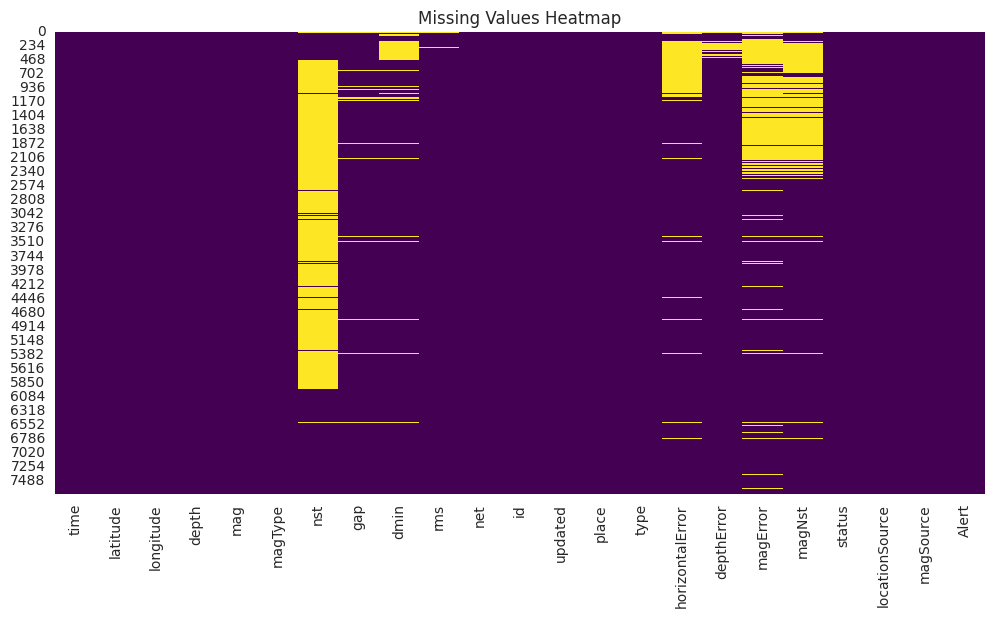

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cmap="viridis", cbar=False)
plt.title("Missing Values Heatmap")
plt.show()

Certain columns, like magType, nst, gap, dmin, horizontalError, and magError, have a significant amount of missing data.Columns with too many missing values may need imputation (e.g. mean, median, or mode) or removal if they aren't crucial.

In [7]:
df.isna().sum()

,0
time,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,5313
gap,324
dmin,702
rms,26


In [8]:
df.dtypes

,0
time,object
latitude,float64
longitude,float64
depth,float64
mag,float64
magType,object
nst,float64
gap,float64
dmin,float64
rms,float64


In [9]:
df.drop(['id','time','status','updated','place','net','locationSource','magSource'],axis=1,inplace=True)




`MISSING VALUES`




In [10]:
df = df.assign(
    dmin=df['dmin'].fillna(df['dmin'].median()),
    rms=df['rms'].fillna(df['rms'].mean()),
    depthError=df['depthError'].fillna(df['depthError'].median()),
    nst=df['nst'].fillna(0),
    magNst=df['magNst'].fillna(0),
    horizontalError=df['horizontalError'].fillna(df['horizontalError'].median()),
    magError=df['magError'].fillna(df['magError'].median()),
    gap=df['gap'].fillna(df['gap'].median()),
)

In [11]:
df

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,type,horizontalError,depthError,magError,magNst,Alert
0,35.590000,-90.480000,15.000,4.62,mw,0.0,38.0,2.39900,0.82082,earthquake,7.10,1.800,0.059,0.0,green
1,32.998667,-115.557500,14.190,5.80,ml,7.0,79.0,0.05768,0.17000,earthquake,1.03,1.780,0.059,0.0,yellow
2,38.190000,-83.950000,10.000,5.00,md,0.0,38.0,2.39900,0.82082,earthquake,7.10,1.800,0.059,0.0,green
3,35.816000,-117.816333,4.766,4.70,ml,13.0,135.0,2.39900,0.66000,earthquake,2.51,31.610,0.424,9.0,green
4,33.095500,-115.624500,18.904,5.75,ml,81.0,34.0,2.39900,0.34000,earthquake,0.56,0.670,0.161,6.0,green
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,-56.357400,147.017000,10.000,5.70,mww,38.0,109.0,13.46200,0.62000,earthquake,12.18,1.916,0.056,31.0,green
7713,-11.751300,166.170800,25.375,5.40,mww,74.0,114.0,6.53500,0.86000,earthquake,10.36,5.288,0.062,25.0,green
7714,-17.709800,168.029200,46.000,6.10,mww,132.0,32.0,4.52800,0.55000,earthquake,8.73,1.944,0.038,66.0,green
7715,55.982500,-153.997300,9.200,5.60,ml,0.0,38.0,2.39900,0.49000,earthquake,7.10,1.500,0.059,0.0,green


In [12]:
df.isna().sum()

,0
latitude,0
longitude,0
depth,0
mag,0
magType,0
nst,0
gap,0
dmin,0
rms,0
type,0


In [13]:
df[df['Alert'] == 'red'].head(10)


,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,type,horizontalError,depthError,magError,magNst,Alert
101,32.286167,-115.295333,9.987,7.20,mw,10.0,239.0,0.51370,0.11,earthquake,1.81,31.61,0.059,0.0,red
330,30.308000,102.888000,14.000,6.60,mww,548.0,12.6,2.39900,1.08,earthquake,7.10,1.80,0.059,0.0,red
544,26.951000,65.500900,15.000,7.70,mww,0.0,17.0,7.24100,0.93,earthquake,7.10,1.60,0.059,0.0,red
1077,27.189100,103.408600,12.000,6.20,mww,0.0,13.0,2.14300,1.00,earthquake,7.10,1.70,0.059,0.0,red
1104,38.215167,-122.312333,11.120,6.02,mw,369.0,28.0,0.03604,0.18,earthquake,0.11,0.15,0.059,0.0,red
1426,28.230500,84.731400,8.220,7.80,mww,0.0,12.0,1.85700,0.96,earthquake,7.30,2.90,0.059,0.0,red
1969,32.788000,130.704200,9.000,6.20,mww,0.0,18.0,0.36600,1.14,earthquake,4.60,1.70,0.059,0.0,red
1976,32.790600,130.754300,10.000,7.00,mww,0.0,32.0,0.34900,0.85,earthquake,4.90,1.70,0.059,0.0,red
2160,42.723000,13.187700,4.440,6.20,mww,0.0,25.0,0.12300,0.68,earthquake,4.40,2.80,0.059,0.0,red
2254,42.956400,13.066600,10.000,6.10,mww,0.0,17.0,0.08100,0.71,earthquake,4.70,1.70,0.059,0.0,red




`**Encoder:Label Encoder,Target Encoder**`





In [14]:
encoder=LabelEncoder()
cols=['Alert','type']
for c in cols:
  encoder.fit(df[c])
  print(encoder.classes_)
  df[c]=encoder.transform(df[c])

['green' 'orange' 'red' 'yellow']
['earthquake' 'nuclear explosion' 'volcanic eruption']


In [15]:

cols = ['magType']
for col in cols:
    target_encoding = df.groupby(col)['Alert'].mean().to_dict()
    df[col] = df[col].map(target_encoding)

In [16]:
df.corr()['Alert']

,Alert
latitude,0.128564
longitude,0.024740
depth,-0.062788
mag,0.206956
magType,0.092754
nst,0.050570
gap,-0.040836
dmin,-0.079113
rms,-0.018621
type,-0.009750


In [17]:
X=df.drop(['Alert'],axis=1)
X

,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,type,horizontalError,depthError,magError,magNst
0,35.590000,-90.480000,15.000,4.62,0.198697,0.0,38.0,2.39900,0.82082,0,7.10,1.800,0.059,0.0
1,32.998667,-115.557500,14.190,5.80,0.009346,7.0,79.0,0.05768,0.17000,0,1.03,1.780,0.059,0.0
2,38.190000,-83.950000,10.000,5.00,0.000000,0.0,38.0,2.39900,0.82082,0,7.10,1.800,0.059,0.0
3,35.816000,-117.816333,4.766,4.70,0.009346,13.0,135.0,2.39900,0.66000,0,2.51,31.610,0.424,9.0
4,33.095500,-115.624500,18.904,5.75,0.009346,81.0,34.0,2.39900,0.34000,0,0.56,0.670,0.161,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7712,-56.357400,147.017000,10.000,5.70,0.119751,38.0,109.0,13.46200,0.62000,0,12.18,1.916,0.056,31.0
7713,-11.751300,166.170800,25.375,5.40,0.119751,74.0,114.0,6.53500,0.86000,0,10.36,5.288,0.062,25.0
7714,-17.709800,168.029200,46.000,6.10,0.119751,132.0,32.0,4.52800,0.55000,0,8.73,1.944,0.038,66.0
7715,55.982500,-153.997300,9.200,5.60,0.009346,0.0,38.0,2.39900,0.49000,0,7.10,1.500,0.059,0.0


In [18]:
y=df['Alert']
y

,Alert
0,0
1,3
2,0
3,0
4,0
...,...
7712,0
7713,0
7714,0
7715,0


In [ ]:

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)
X_scaled

array([[0.67756871, 0.24862123, 0.02493384, ..., 0.05633803, 0.03593179,
        0.        ],
       [0.6609045 , 0.1789568 , 0.02372952, ..., 0.05571205, 0.03593179,
        0.        ],
       [0.69428866, 0.26676134, 0.01749978, ..., 0.05633803, 0.03593179,
        0.        ],
       ...,
       [0.33481112, 0.96675081, 0.07102501, ..., 0.06084507, 0.02314251,
        0.06918239],
       [0.80870775, 0.07217237, 0.01631033, ..., 0.04694836, 0.03593179,
        0.        ],
       [0.57677445, 0.28741468, 0.03569984, ..., 0.19577465, 0.0182704 ,
        0.11215933]])

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42)

**************** {'KNeighborsClassifier'} ****************
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2213
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        13
           3       0.33      0.12      0.17        77

    accuracy                           0.95      2316
   macro avg       0.32      0.28      0.29      2316
weighted avg       0.93      0.95      0.94      2316



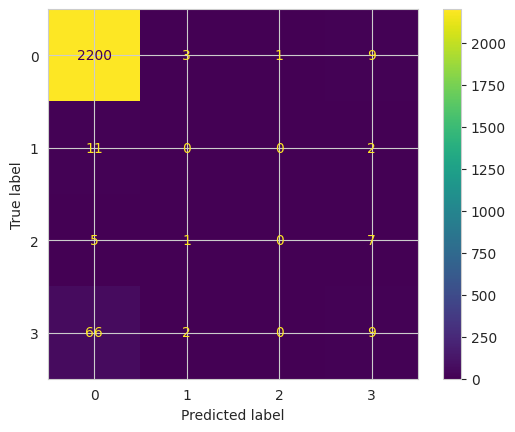

**************** {'SVC'} ****************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2213
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        13
           3       0.50      0.03      0.05        77

    accuracy                           0.96      2316
   macro avg       0.36      0.26      0.26      2316
weighted avg       0.93      0.96      0.94      2316



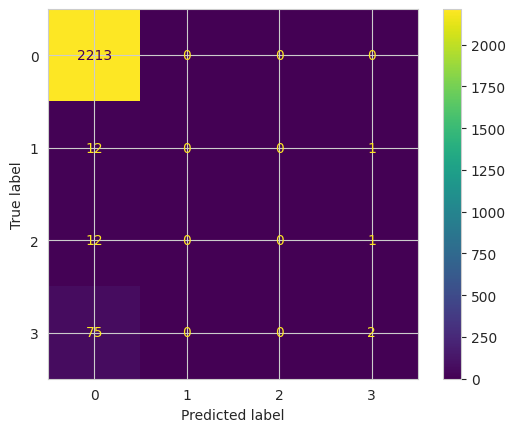

**************** {'GaussianNB'} ****************
              precision    recall  f1-score   support

           0       1.00      0.32      0.48      2213
           1       0.01      0.38      0.01        13
           2       0.03      0.46      0.06        13
           3       0.05      0.34      0.08        77

    accuracy                           0.32      2316
   macro avg       0.27      0.37      0.16      2316
weighted avg       0.95      0.32      0.46      2316



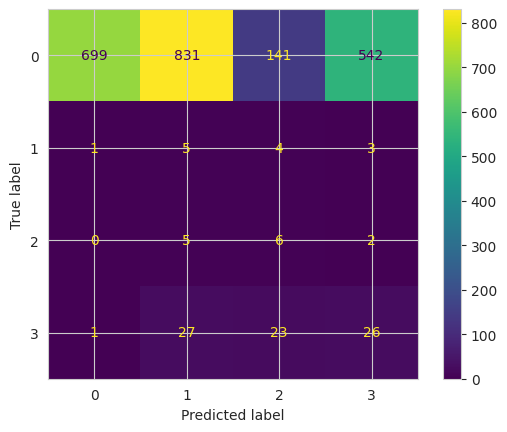

**************** {'DecisionTreeClassifier'} ****************
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2213
           1       0.05      0.08      0.06        13
           2       0.17      0.15      0.16        13
           3       0.25      0.26      0.26        77

    accuracy                           0.94      2316
   macro avg       0.36      0.36      0.36      2316
weighted avg       0.94      0.94      0.94      2316



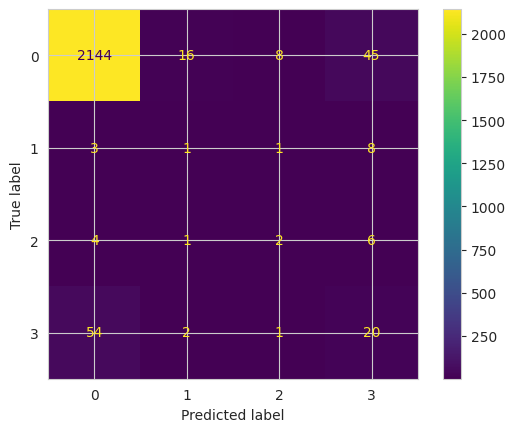

**************** {'RandomForestClassifier'} ****************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2213
           1       0.00      0.00      0.00        13
           2       0.00      0.00      0.00        13
           3       0.33      0.05      0.09        77

    accuracy                           0.96      2316
   macro avg       0.32      0.26      0.27      2316
weighted avg       0.93      0.96      0.94      2316



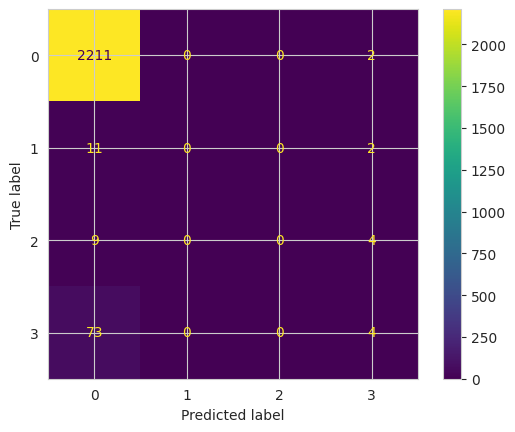

**************** {'AdaBoostClassifier'} ****************
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      2213
           1       0.00      0.00      0.00        13
           2       0.67      0.15      0.25        13
           3       0.33      0.05      0.09        77

    accuracy                           0.96      2316
   macro avg       0.49      0.30      0.33      2316
weighted avg       0.93      0.96      0.94      2316



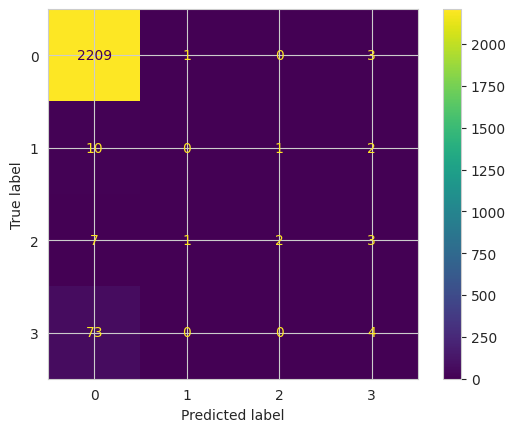

**************** {'GradientBoostingClassifier'} ****************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2213
           1       0.25      0.08      0.12        13
           2       0.12      0.08      0.10        13
           3       0.43      0.16      0.23        77

    accuracy                           0.96      2316
   macro avg       0.44      0.33      0.36      2316
weighted avg       0.94      0.96      0.95      2316



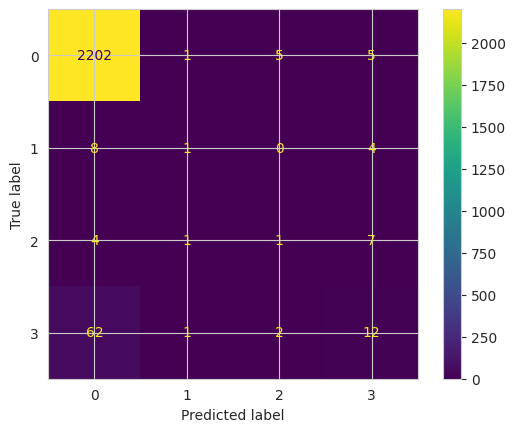

**************** {'XGBClassifier'} ****************
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2213
           1       0.00      0.00      0.00        13
           2       0.50      0.08      0.13        13
           3       0.51      0.27      0.36        77

    accuracy                           0.96      2316
   macro avg       0.50      0.34      0.37      2316
weighted avg       0.95      0.96      0.95      2316



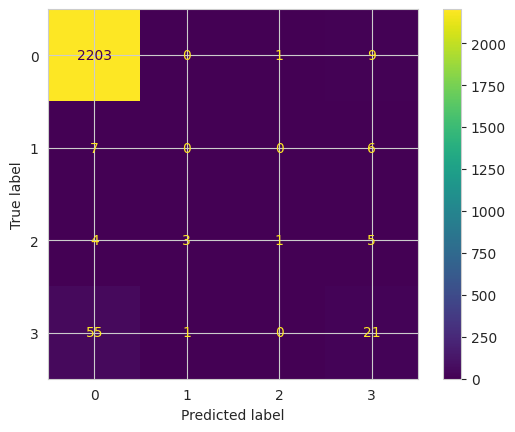

In [21]:

knn=KNeighborsClassifier()
sv=SVC(kernel='poly')
nb=GaussianNB()
tr=DecisionTreeClassifier()
rf=RandomForestClassifier(random_state=42)
ad=AdaBoostClassifier()
gr=GradientBoostingClassifier()
xg=XGBClassifier(verbosity=0)
models=[knn,sv,nb,tr,rf,ad,gr,xg]
for model in models:
  print("****************",{model.__class__.__name__},"****************")
  model.fit(X_train,y_train)
  y_pred1=model.predict(X_test)
  print(classification_report(y_test,y_pred1,zero_division=0))
  disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred1)
  plt.show()

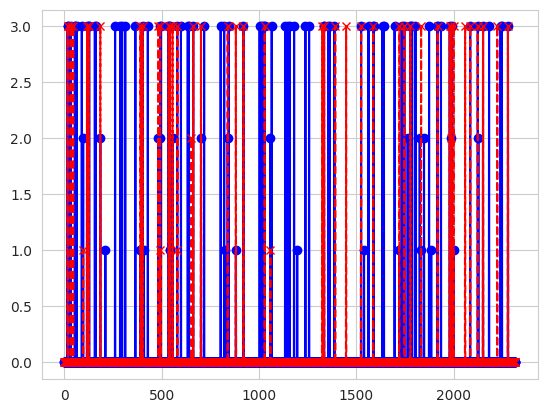

In [22]:
plt.plot(range(len(y_test)),y_test,color='blue',label='Actual values',linestyle='-',marker='o')

plt.plot(range(len(y_pred1)),y_pred1,color='red',label='Predicted values',linestyle='--',marker='x')

In [23]:
ad.score(X_train,y_train)

0.9588965006480281

In [24]:
ad.score(X_test,y_test)

0.9563903281519862

In [25]:
df['latitude'].unique()

array([ 35.59     ,  32.9986667,  38.19     , ..., -17.7098   ,
        55.9825   ,  19.9162   ])

**`IMBALANCE`**

<ipython-input-26-f97bd4625e13>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


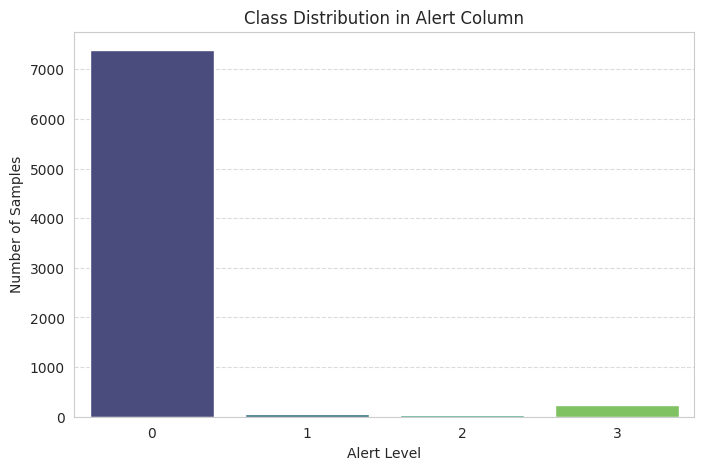

In [26]:
class_distribution = df['Alert'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')

plt.title('Class Distribution in Alert Column')
plt.xlabel('Alert Level')
plt.ylabel('Number of Samples')
plt.grid(axis='y', linestyle='--', alpha=0.7)




`#Over Sampling`




In [27]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
XO,yO=os.fit_resample(X,y)
yO.value_counts()

,count
Alert,
0,7386
3,7386
2,7386
1,7386


In [28]:

XO_scaled=scaler.fit_transform(XO)

In [29]:
XO_train,XO_test,yO_train,yO_test=train_test_split(XO_scaled,yO,test_size=0.3,random_state=42)

**************************** {'KNeighborsClassifier'} ***************************
              precision    recall  f1-score   support

           0       1.00      0.89      0.94      2195
           1       0.97      1.00      0.99      2303
           2       0.98      1.00      0.99      2165
           3       0.92      0.97      0.95      2201

    accuracy                           0.97      8864
   macro avg       0.97      0.96      0.96      8864
weighted avg       0.97      0.97      0.96      8864



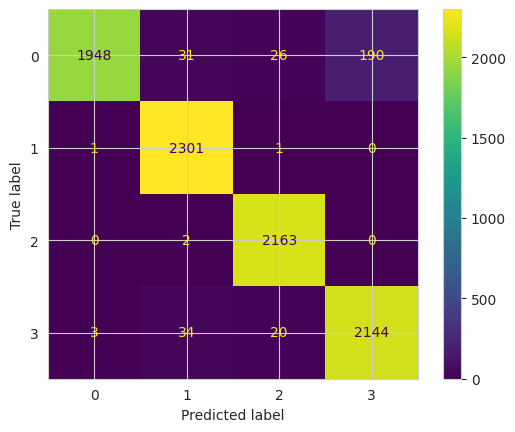

**************************** {'SVC'} ***************************
              precision    recall  f1-score   support

           0       0.91      0.86      0.89      2195
           1       0.68      0.74      0.71      2303
           2       0.82      0.76      0.78      2165
           3       0.71      0.73      0.72      2201

    accuracy                           0.77      8864
   macro avg       0.78      0.77      0.77      8864
weighted avg       0.78      0.77      0.77      8864



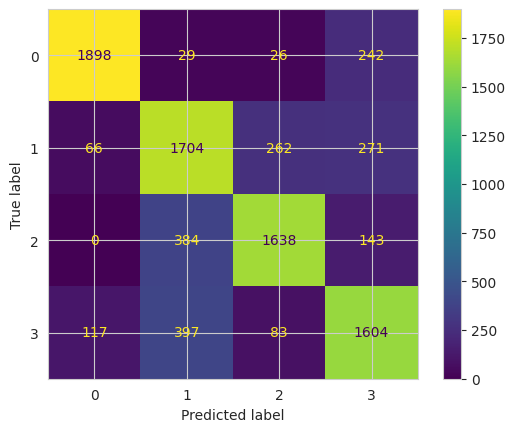

**************************** {'GaussianNB'} ***************************
              precision    recall  f1-score   support

           0       0.97      0.27      0.42      2195
           1       0.32      0.34      0.33      2303
           2       0.43      0.88      0.58      2165
           3       0.32      0.20      0.24      2201

    accuracy                           0.42      8864
   macro avg       0.51      0.42      0.39      8864
weighted avg       0.51      0.42      0.39      8864



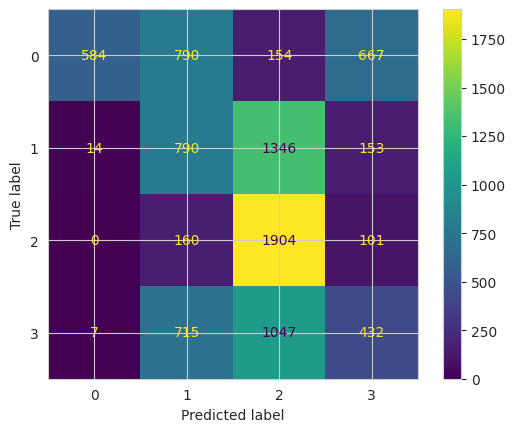

**************************** {'DecisionTreeClassifier'} ***************************
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      2195
           1       0.96      0.98      0.97      2303
           2       0.98      0.99      0.99      2165
           3       0.92      0.94      0.93      2201

    accuracy                           0.96      8864
   macro avg       0.96      0.96      0.96      8864
weighted avg       0.96      0.96      0.96      8864



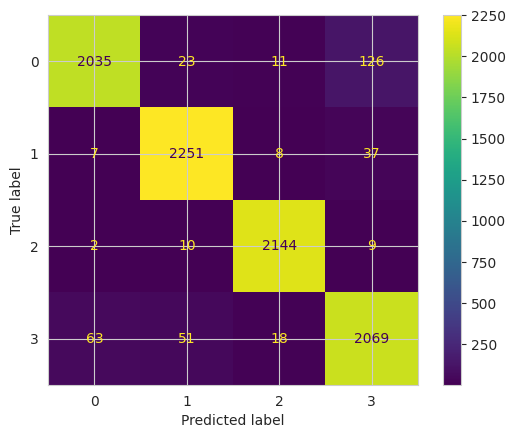

**************************** {'RandomForestClassifier'} ***************************
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2195
           1       0.99      1.00      1.00      2303
           2       1.00      1.00      1.00      2165
           3       0.98      0.99      0.98      2201

    accuracy                           0.99      8864
   macro avg       0.99      0.99      0.99      8864
weighted avg       0.99      0.99      0.99      8864



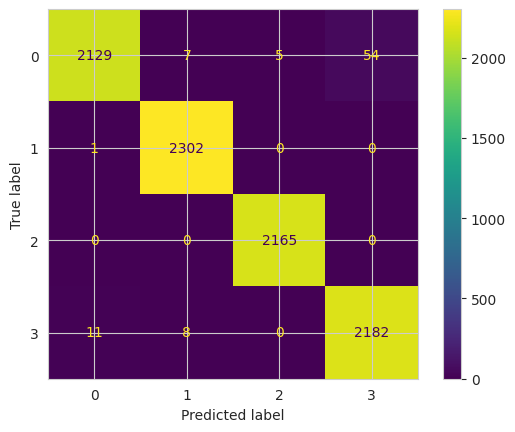

**************************** {'AdaBoostClassifier'} ***************************
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      2195
           1       0.46      0.48      0.47      2303
           2       0.53      0.41      0.46      2165
           3       0.50      0.66      0.57      2201

    accuracy                           0.58      8864
   macro avg       0.60      0.58      0.58      8864
weighted avg       0.60      0.58      0.58      8864



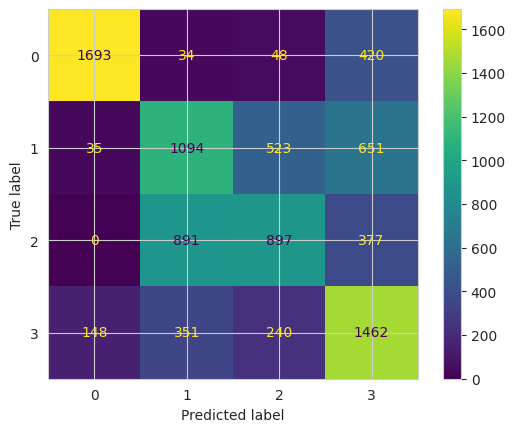

**************************** {'GradientBoostingClassifier'} ***************************
              precision    recall  f1-score   support

           0       0.98      0.93      0.95      2195
           1       0.89      0.91      0.90      2303
           2       0.91      0.98      0.95      2165
           3       0.89      0.85      0.87      2201

    accuracy                           0.92      8864
   macro avg       0.92      0.92      0.92      8864
weighted avg       0.92      0.92      0.91      8864



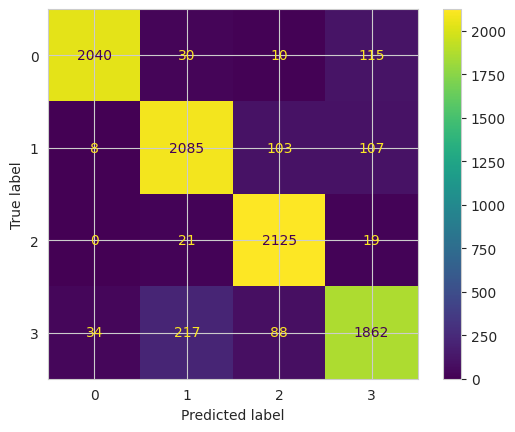

**************************** {'XGBClassifier'} ***************************
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2195
           1       0.99      1.00      1.00      2303
           2       1.00      1.00      1.00      2165
           3       0.98      0.99      0.98      2201

    accuracy                           0.99      8864
   macro avg       0.99      0.99      0.99      8864
weighted avg       0.99      0.99      0.99      8864



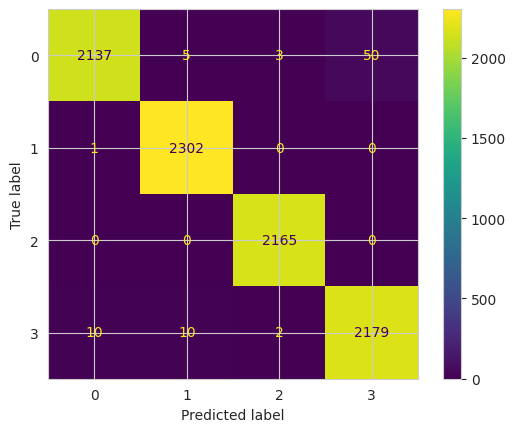

In [30]:
for m in models:
  print('****************************',{m.__class__.__name__},'***************************')
  m.fit(XO_train,yO_train)
  y_pred2=m.predict(XO_test)
  print(classification_report(yO_test,y_pred2))
  dis=ConfusionMatrixDisplay.from_predictions(yO_test,y_pred2)
  plt.show()




`Hyperparameter Tuning`




In [31]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV

In [32]:
param_dist = {
    'n_estimators': np.arange(100, 500, 50),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'max_depth': np.arange(3, 10, 1),
    'min_child_weight': np.arange(1, 10, 1)
}


In [33]:
random_search = RandomizedSearchCV(
    estimator=xg,
    param_distributions=param_dist,
    n_iter=50
)

random_search.fit(XO_train, yO_train)


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None...
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='multi:softprob', ...),
                   n_iter=50,
                   param_distributions={'learning_rate': array([0.01      , 0.04222222, 0.07444444, 0.10666667, 0.13888889,
       0.17111111, 0.20333333, 0.23555556, 0.26777778, 0.3       ]),
                                        'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                                        'min_child_weight': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([100, 150, 200, 250, 300, 350, 400, 450])})

In [34]:
print("Best Parameters:", random_search.best_params_)
best_xgb = random_search.best_estimator_
y_pred5 = best_xgb.predict(XO_test)

Best Parameters: {'n_estimators': 400, 'min_child_weight': 6, 'max_depth': 9, 'learning_rate': 0.1711111111111111}


In [35]:
print(classification_report(yO_test,y_pred5))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2195
           1       1.00      1.00      1.00      2303
           2       1.00      1.00      1.00      2165
           3       0.98      0.99      0.99      2201

    accuracy                           0.99      8864
   macro avg       0.99      0.99      0.99      8864
weighted avg       0.99      0.99      0.99      8864



In [36]:
import pickle
pickle.dump(rf,open('RFRANDOMSEARCH_model.sav','wb'))

In [37]:
pickle.dump(scaler,open('scalerRandomSearch.sav','wb'))